In [1]:
import os
import numpy as np
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import LSTM, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, TimeDistributed
from keras.optimizers import Adam

In [2]:
# GLOBAL VARIABLES
path = "IITBBS_Dataset_V2"
images = []
classid = []
inputShape = (32, 32, 3)

In [3]:
myList = os.listdir(path)
noofclasses = len(myList)
print("No of Classes Detected = ", noofclasses)

print("Importing Classes...")

for x in range(0, noofclasses):
    picList = os.listdir(path+"/"+myList[x])
    for y in picList:
        curImg = cv2.imread(path+"/"+myList[x]+"/"+y)
        curImg = cv2.resize(curImg, (inputShape[0], inputShape[1]))
        images.append(curImg)
        classid.append(x)
    print(x, end=" ")
print(" ")
print("No of images imported = ", len(images))

# To convert into numpy array
images = np.array(images)
classid = np.array(classid)

print(images.shape)
print(classid.shape)

No of Classes Detected =  62
Importing Classes...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61  
No of images imported =  26456
(26456, 32, 32, 3)
(26456,)


In [4]:
classid = classid.reshape(-1, 1)
noOfClasses = classid
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(classid).toarray()

images, Y = shuffle(images, Y, random_state=69)

x_train, x_test, y_train, y_test = train_test_split(
    images, Y, test_size=0.2, random_state=69)
x_train, x_validation, y_train, y_validation = train_test_split(
    x_train, y_train, test_size=0.2, random_state=69)

print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)


(16931, 32, 32, 3)
(5292, 32, 32, 3)
(4233, 32, 32, 3)


In [5]:
model = Sequential()

# # Step 1: CNN for spatial feature extraction
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Flatten())

# # Step 2: LSTM for temporal modeling
# model.add(Reshape((1, -1)))
# model.add(LSTM(256))

# # Step 3: Fully connected layer for prediction
# model.add(Dense(128, activation='relu'))
# model.add(Dense(62, activation='softmax'))


# Step 1: Reshape input data for LSTM
model.add(Reshape((32 * 32, 3), input_shape=(32, 32, 3)))

# Step 2: LSTM for temporal modeling
model.add(LSTM(256, return_sequences=True))

# Step 3: Reshape output of LSTM for spatial feature extraction
model.add(Reshape((32, 32, 256)))

# Step 4: CNN for spatial feature extraction
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())

# Step 5: Fully connected layer for prediction
model.add(Dense(128, activation='relu'))
model.add(Dense(62, activation='softmax'))

In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Train the model
epochs = 1
history = model.fit(x_train, y_train, epochs=epochs, verbose=1, validation_data=(x_validation, y_validation))

530/530 [==============================] - 2644s 5s/step - loss: 3.1367 - accuracy: 0.2084 - val_loss: 2.3065 - val_accuracy: 0.3761


In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

166/166 [==============================] - 117s 705ms/step - loss: 2.2936 - accuracy: 0.3776
Test Loss: 2.2935805320739746
Test Accuracy: 0.37755101919174194


In [10]:
# Saving the model
import pickle
pickle_out = open("model_trained_iitbbs_cnn+lstm.p", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

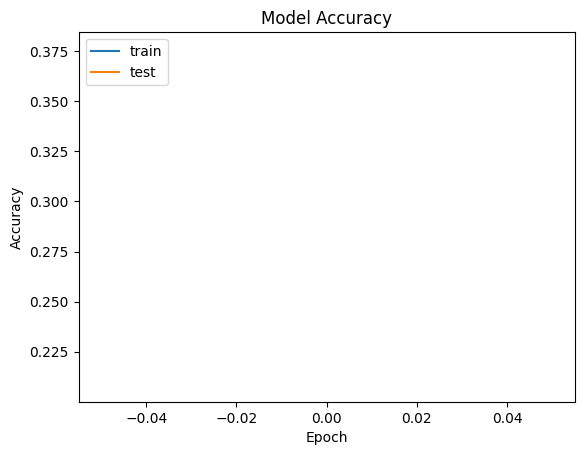

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()